# Projeto 1 - Ciência dos Dados

Nome: Lucas Keichi Fukada

## Pergunta (s) a ser respondida

A entrada e saída da Venezuela no MERCOSUL fez diferença para a porcentagem de população empregada?

## Explicação da hipótese e mecanismo

As pessoas podem conseguir emprego por conta da possibilidade de receber a permissão de residência facilitada nos outros países desde que ambos estejam incluídos no bloco econômico Sul Amerciano, as taxas de pessoas empregadas deveriam receber alguma alteração.

https://www.weforum.org/agenda/2015/09/how-trade-liberalisation-affects-unemployment-and-real-income/

## Bases de dados usadas

https://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page3.jspx?MBI_ID=7&_afrLoop=3055538129811766&_afrWindowMode=0&_afrWindowId=mdmwh3h32_1#!%40%40%3F_afrWindowId%3Dmdmwh3h32_1%26_afrLoop%3D3055538129811766%26MBI_ID%3D7%26_afrWindowMode%3D0%26_adf.ctrl-state%3Dmdmwh3h32_45 - Porcentagem de empregados acima de 15 anos.

## Análise de dados

Para analisar tal efeito, serão manipulados os dados sobre a quantidade de pessoas empregadas, oferecidos pela Organização Internacional do Trabalho, especificamente perto dos anos de entrada e suspensão da Venezuela. Também serão analisados outros países, nesse caso os outros integrantes dos BRICS por apresentarem algumas características similares.

In [249]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

emprego = pd.read_excel("employmentratio.xlsx")

In [250]:
emprego = emprego.set_index("Reference area")
emprego_mercosul = emprego.loc[["Brazil", "Argentina", "Uruguay", "Paraguay", "Venezuela"]]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [251]:
emprego_mercosul = emprego_mercosul[emprego_mercosul.Age == "15+"]
emprego_mercosul.time = emprego_mercosul.Time.astype(dtype="int64")
emprego_mercosul

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Source type,Age,Time,Male,Female,Total
Reference area,,,,,,
Brazil,ILO estimate,15+,2000.0,43307.834,27508.702,57.81
Brazil,ILO estimate,15+,2001.0,43957.302,28858.944,58.20
Brazil,ILO estimate,15+,2002.0,44989.912,30382.597,58.98
Brazil,ILO estimate,15+,2003.0,45511.004,30922.585,58.59
Brazil,ILO estimate,15+,2004.0,47146.580,32420.529,59.79
Brazil,ILO estimate,15+,2005.0,47918.255,33525.438,60.06
Brazil,ILO estimate,15+,2006.0,48887.603,34432.119,60.30
Brazil,ILO estimate,15+,2007.0,49702.407,34986.486,60.23
Brazil,ILO estimate,15+,2008.0,51041.320,35996.715,60.87


In [252]:
emprego_mercosul = emprego_mercosul.pivot_table(values='Total', index=emprego_mercosul.index, columns='Time', aggfunc='first')
emprego_mercosul

Time,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Reference area,,,,,,,,,,,,,,,,,,,,,
Argentina,53.00,51.39,49.44,52.41,53.93,54.91,56.05,56.38,56.09,55.94,...,56.12,55.51,55.55,55.56,55.57,54.76,54.33,54.10,54.02,53.90
Brazil,57.81,58.20,58.98,58.59,59.79,60.06,60.30,60.23,60.87,60.30,...,59.74,59.68,58.69,56.42,55.88,55.92,55.99,56.13,56.15,56.07
Paraguay,62.85,62.91,63.10,63.87,67.24,67.44,64.94,66.44,66.69,67.19,...,68.16,66.03,66.40,66.62,67.25,67.32,67.46,67.57,67.59,67.51
Uruguay,54.41,55.35,54.63,53.92,54.13,54.99,56.78,58.85,60.25,60.69,...,60.70,61.09,60.08,59.59,59.13,59.21,59.33,59.45,59.51,59.58


## Brasil

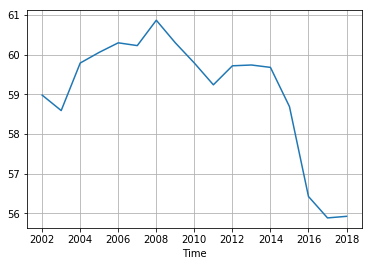

In [253]:
emprego_brazil = emprego_mercosul.loc["Brazil",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]
emprego_brazil.plot.line(grid = True)

## Argentina

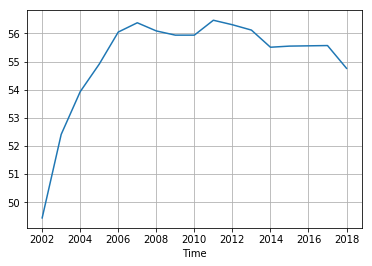

In [254]:
emprego_argentina = emprego_mercosul.loc["Argentina",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]
emprego_argentina.plot.line(grid = True)

## Paraguai

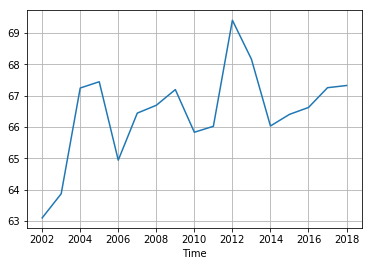

In [255]:
emprego_paraguay = emprego_mercosul.loc["Paraguay",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]
emprego_paraguay.plot.line(grid = True)

## Uruguai

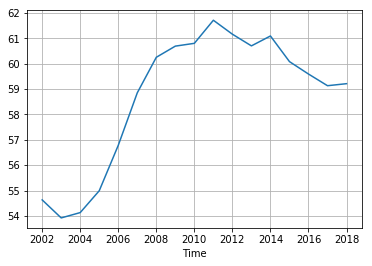

In [256]:
emprego_uruguay = emprego_mercosul.loc["Uruguay",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]
emprego_uruguay.plot.line(grid = True)

## MERCOSUL

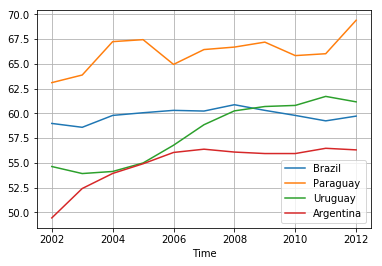

In [257]:
paises = ["Brazil", "Paraguay", "Uruguay", "Argentina"]
for i in paises:
    emprego_mercosul.loc[i, [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]].plot(label = i)
plt.legend()
plt.grid(True)
plt.show()

In [258]:
emprego_mercosul = emprego_mercosul.transpose()
emprego_mercosul

Reference area,Argentina,Brazil,Paraguay,Uruguay
Time,,,,
2000.0,53.00,57.81,62.85,54.41
2001.0,51.39,58.20,62.91,55.35
2002.0,49.44,58.98,63.10,54.63
2003.0,52.41,58.59,63.87,53.92
2004.0,53.93,59.79,67.24,54.13
2005.0,54.91,60.06,67.44,54.99
2006.0,56.05,60.30,64.94,56.78
2007.0,56.38,60.23,66.44,58.85
2008.0,56.09,60.87,66.69,60.25


In [274]:
emprego_mercosul.columns = ["Argentina","Brazil", "Paraguay", "Uruguay"]
emprego_mercosul = emprego_mercosul.loc[[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]

In [286]:
print(emprego_mercosul.corr())

           Argentina    Brazil  Paraguay   Uruguay
Argentina   1.000000  0.157815  0.661069  0.733213
Brazil      0.157815  1.000000 -0.023467 -0.010358
Paraguay    0.661069 -0.023467  1.000000  0.483375
Uruguay     0.733213 -0.010358  0.483375  1.000000


## País 1 x País 2

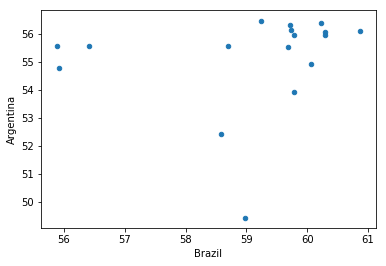

In [287]:
emprego_mercosul.plot.scatter(x = "Brazil", y = "Argentina")

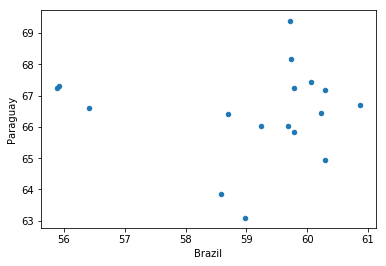

In [288]:
emprego_mercosul.plot.scatter(x = "Brazil", y = "Paraguay")

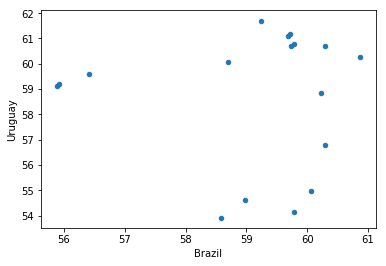

In [289]:
emprego_mercosul.plot.scatter(x = "Brazil", y = "Uruguay")

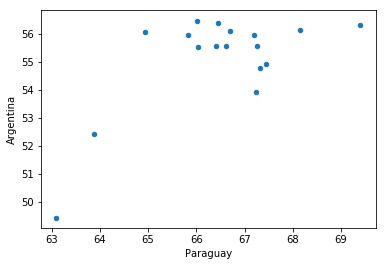

In [290]:
emprego_mercosul.plot.scatter(x = "Paraguay", y = "Argentina")

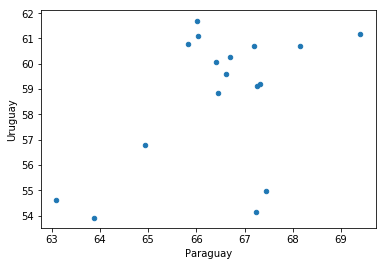

In [291]:
emprego_mercosul.plot.scatter(x = "Paraguay", y = "Uruguay")

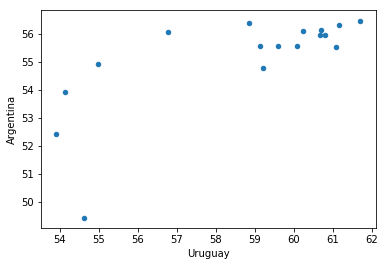

In [292]:
emprego_mercosul.plot.scatter(x = "Uruguay", y = "Argentina")

## BRICS

In [266]:
emprego_brics = emprego.loc[["India", "China", "South Africa", "Russian Federation"]]
emprego_brics = emprego_brics[emprego_brics.Age == "15+"]
emprego_brics.time = emprego_brics.Time.astype(dtype="int64")
emprego_brics

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Source type,Age,Time,Male,Female,Total
Reference area,,,,,,
India,ILO estimate,15+,2000,285569.045,98774.723,55.92
India,ILO estimate,15+,2001,291961.195,101920.530,56.02
India,ILO estimate,15+,2002,298473.574,105053.121,56.10
India,ILO estimate,15+,2003,305449.502,108186.626,56.22
India,ILO estimate,15+,2004,313265.472,111605.662,56.47
India,ILO estimate,15+,2005,320869.779,115043.487,56.69
India,ILO estimate,15+,2006,326593.614,113008.547,55.99
India,ILO estimate,15+,2007,332272.966,110898.988,55.30
India,ILO estimate,15+,2008,337116.117,108661.196,54.52


In [267]:
emprego_brics = emprego_brics.pivot_table(values='Total', index=emprego_brics.index, columns='Time', aggfunc='first')
emprego_brics

Time,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Reference area,,,,,,,,,,,,,,,,,,,,,
China,74.67,73.59,72.51,71.41,70.73,70.08,69.58,69.19,68.57,68.09,...,67.18,66.95,66.68,66.42,66.16,65.68,65.18,64.68,64.15,63.66
India,55.92,56.02,56.10,56.22,56.47,56.69,55.99,55.30,54.52,53.57,...,50.78,50.80,50.76,50.71,50.72,50.60,50.49,50.37,50.25,50.13
Russian Federation,54.81,54.63,55.79,55.27,55.89,56.62,56.90,58.31,58.59,57.33,...,59.19,59.43,59.20,59.36,59.16,59.06,58.76,58.47,57.85,57.31
South Africa,39.15,38.82,37.32,36.75,37.18,38.55,39.69,40.19,43.26,41.29,...,40.15,40.13,40.90,40.19,40.40,40.56,40.31,40.12,39.93,39.97


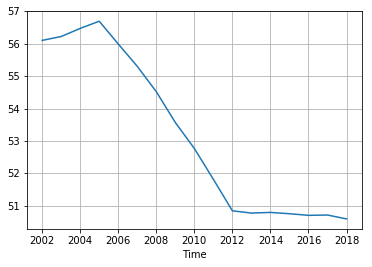

In [273]:
emprego_brics.loc["India",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]].plot.line(grid = True)

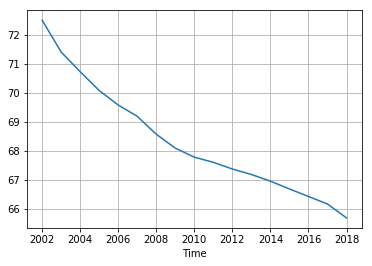

In [281]:
emprego_brics.loc["China",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]].plot.line(grid = True)

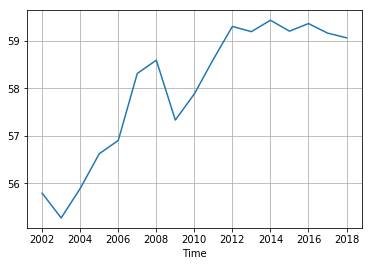

In [282]:
emprego_brics.loc["Russian Federation",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]].plot.line(grid = True)

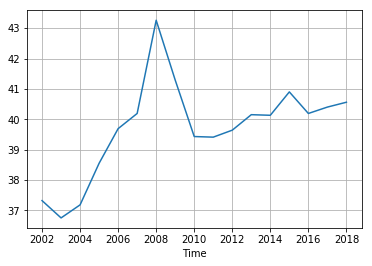

In [283]:
emprego_brics.loc["South Africa",[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]].plot.line(grid = True)

## Conclusão

Com exceção do Brasil, os países participante do MERCOSUL apresentam um certo grau de covariância entre si durante o período de integração e suspensão da Venezuela no bloco econômico. 